Goals : clustering customer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cluster import MiniBatchKMeans

from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
pd.set_option('display.max_columns', None)

# Read Data

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Cleaning

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# fill null value income with median
# df['Income'] = df['Income'].dropna()
df['Income'].fillna(df['Income'].mode()[0], inplace=True)

In [8]:
df.duplicated().sum() # no data duplicated

0

the data is quite good and then we have to manipulate the data to make it easier to understand and analyze

# Feature Engineering

We must make the `Dt_Customer` column a datetime, so that it can be analyzed when the customer was first recorded and the last time on this data

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

print('date data created on date',min(df['Dt_Customer']))
print('till date',max(df['Dt_Customer']))

date data created on date 2012-01-08 00:00:00
till date 2014-12-06 00:00:00


In [10]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

we need an additional column to analyze how often customers buy goods to measure the purchasing power of customers

In [11]:
df = df.copy()

In [12]:
print('Total Category in Marital_Status Column: \n',df['Marital_Status'].value_counts(), '\n')
print('Total Category in Education Column: \n',df['Education'].value_counts(), '\n')

Total Category in Marital_Status Column: 
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total Category in Education Column: 
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64 



The next step is that we will shorten the existing categories so that they are more general and simpler for our model to understand later. <br>

- the `Marital_Status` column will be replaced with living_with to predict customers living with partners or living alone. this will relate to the needs of consumers with partners or alone.<br>

- the `Total_Family` column will contain the total number of families in the consumer's house. <br>

- The `Education` column will be divided into 3 categories, namely undergraduate, graduate, and postgraduate. <br>

- the `Year_Birth` column will be changed to the age of the consumer. <br>

In [13]:
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [14]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [15]:
LE=LabelEncoder()
df['Education']=df[['Education']].apply(LE.fit_transform)

for i in ['Living_With']:
    onehots = pd.get_dummies(df[i], prefix='Living_With')
    df = df.join(onehots)

In [16]:
df['Total_Family'] = df['Kidhome'] + df['Kidhome'] + df['Kidhome'] + df['Living_With_Partner']

In [17]:
df['Age'] = 2021 - df['Year_Birth']

In [18]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

In [19]:
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2239


removing more outliers will destroy the model segmentation, so i decided to keep some of the outliers especially in the age column, this may be because the dataset is quite small

In [20]:
df_old = df.copy()

we will drop some columns to reduce the curse of dimensionality

In [21]:
df = df.drop(columns = ['Living_With','Z_Revenue', 'Z_CostContact', 'Marital_Status', 'Year_Birth', 'Dt_Customer', 'ID', 'Living_With_Partner', 'Living_With_Alone', 'Kidhome', 'Teenhome', 'Complain', 'Recency'])

# Preprocessing Data

In [22]:
df.head(10)

,Education,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Spent,Total_Family,Age,Total_Promos
0,0,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,1617,0,64,0
1,0,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,27,3,67,0
2,0,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,776,1,56,0
3,0,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,53,4,37,0
4,1,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,422,4,40,0
5,1,62513.0,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,716,1,54,0
6,0,55635.0,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,590,0,50,0
7,1,33454.0,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,169,4,36,0
8,1,30351.0,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,1,46,4,47,0
9,1,5648.0,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,49,4,71,1


<AxesSubplot:>

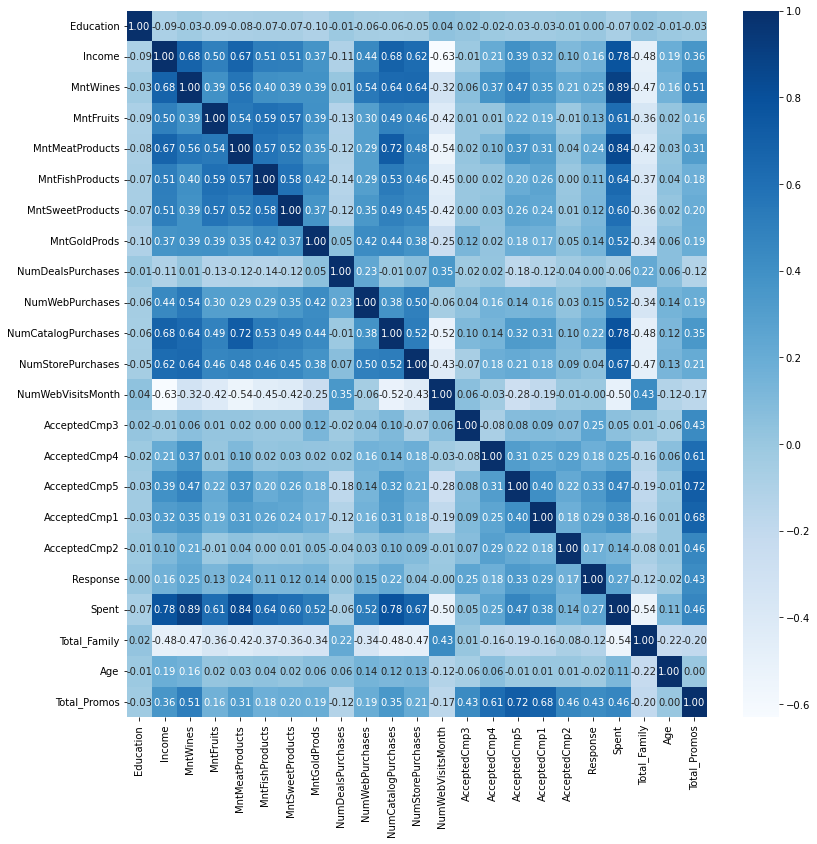

In [23]:
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [125]:
people = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Complain']
person1 = ['Age', 'Total_Family', 'Income']
person2 = ['Education', 'Kidhome', 'Teenhome', 'Spent']
product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Spent']
place = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
promotion = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Total_Promos']

In [25]:
# scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns)
scaled_df.head(5)

,Education,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Spent,Total_Family,Age,Total_Promos
0,-0.895334,0.303553,0.983339,1.551126,1.679196,2.461517,1.476020,0.842815,0.349782,1.408863,2.510257,-0.551136,0.693887,-0.280208,-0.283899,-0.280208,-0.262174,-0.116537,2.388220,1.678944,-1.166062,0.984922,-0.439154
1,-0.895334,-0.235228,-0.870826,-0.636311,-0.713430,-0.650588,-0.631700,-0.729179,-0.167840,-1.110374,-0.568888,-1.166440,-0.130311,-0.280208,-0.283899,-0.280208,-0.262174,-0.116537,-0.418722,-0.961639,0.603981,1.235281,-0.439154
2,-0.895334,0.919126,0.362313,0.570551,-0.177305,1.344820,-0.147167,-0.039035,-0.685461,1.408863,-0.226761,1.294778,-0.542410,-0.280208,-0.283899,-0.280208,-0.262174,-0.116537,-0.418722,0.282258,-0.576048,0.317300,-0.439154
3,-0.895334,-1.135085,-0.870826,-0.560882,-0.651399,-0.504136,-0.583247,-0.748349,-0.167840,-0.750483,-0.911015,-0.551136,0.281788,-0.280208,-0.283899,-0.280208,-0.262174,-0.116537,-0.418722,-0.918460,1.193995,-1.268304,-0.439154
4,0.567916,0.310633,-0.389456,0.419693,-0.217182,0.154898,-0.001807,-0.556643,1.385025,0.329190,0.115367,0.064169,-0.130311,-0.280208,-0.283899,-0.280208,-0.262174,-0.116537,-0.418722,-0.305645,1.193995,-1.017946,-0.439154


In [26]:
# PCA
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2239.0,6.257711e-17,2.795913,-5.132514,-2.495872,-0.796748,2.130652,9.031439
col2,2239.0,-2.161935e-17,1.586019,-3.469524,-0.909949,-0.038031,0.364547,9.398896
col3,2239.0,5.538719e-17,1.279781,-3.692860,-0.917445,-0.281733,0.727046,5.099169


# Clustering 

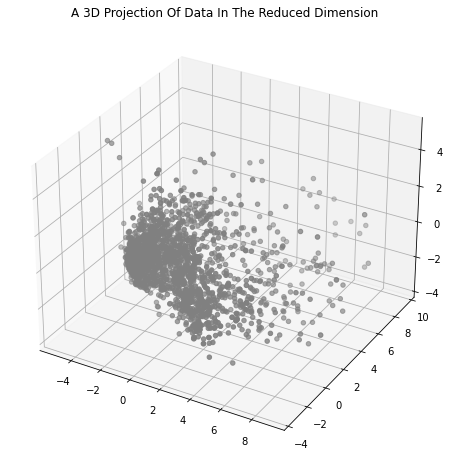

In [27]:
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="gray", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

[13323.605744578523, 9241.668630583505, 6727.362975898959, 5872.067902716883, 5194.770988716017, 4565.449385212578, 4121.5511307626475, 3799.010293416586, 3552.855095705573]


<AxesSubplot:>

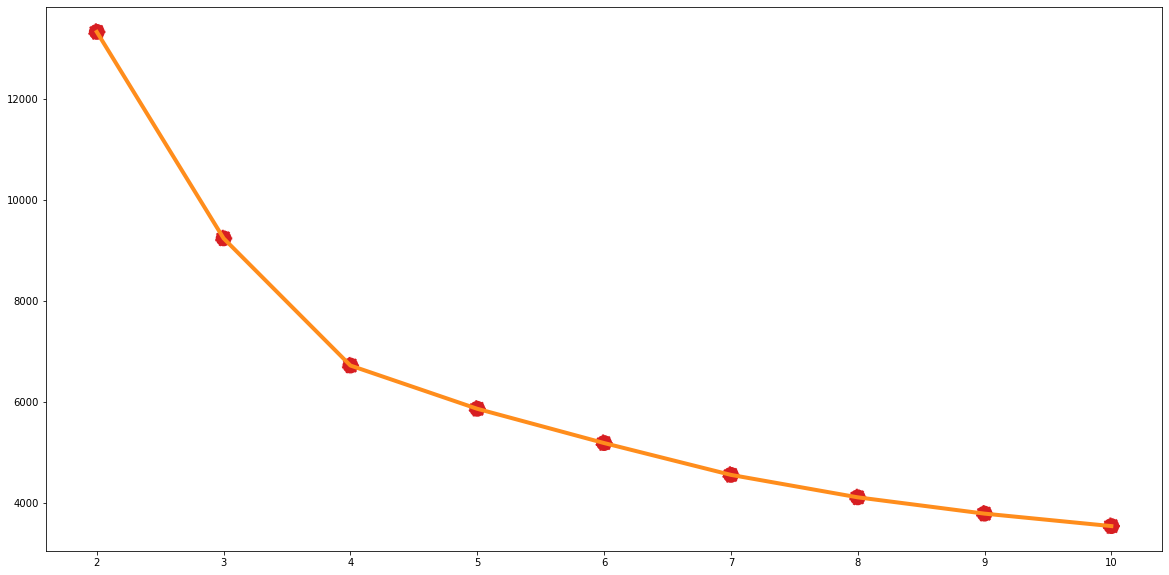

In [28]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(PCA_df.values)
    inertia.append(kmeans.inertia_)

print(inertia)

plt.figure(figsize=(20,10))

sns.lineplot(x=range(2, 11), y=inertia, color='#FF8D1C', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#D71E22',  linestyle='--')

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(PCA_df.values)

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4)
ac.fit(PCA_df.values)

AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC

In [30]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

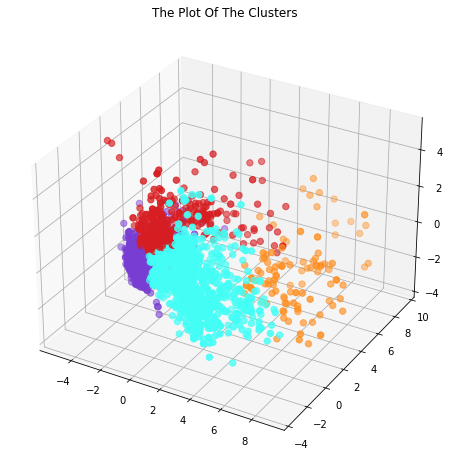

In [31]:
cmap = colors.ListedColormap(["#44FFF7","#D71E22", "#FF8D1C","#783DD2"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

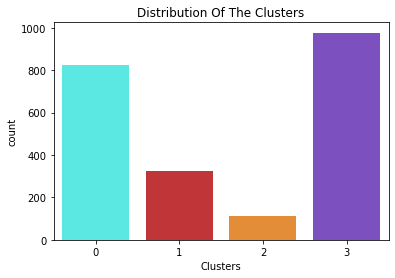

In [32]:
#Plotting countplot of clusters
pal = ["#44FFF7","#D71E22", "#FF8D1C","#783DD2"]
pl = sns.countplot(x=PCA_df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [33]:
PCA_df.head(5)

,col1,col2,col3,Clusters
0,3.968591,-1.370772,0.886314,0
1,-2.412243,-0.063151,-0.595087,3
2,1.421233,-1.505235,0.349100,0
3,-2.807689,0.160539,-0.739598,3
4,-0.694094,-0.661915,0.555063,0


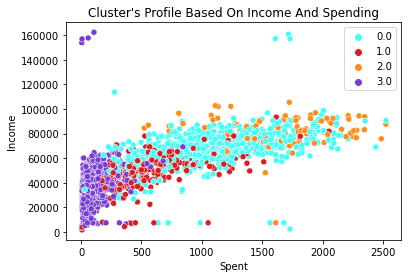

In [34]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=PCA_df['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


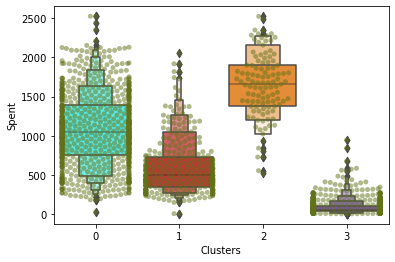

In [35]:
plt.figure()
pl=sns.swarmplot(x=PCA_df['Clusters'], y=df["Spent"], color= "#617218", alpha=0.5 )
pl=sns.boxenplot(x=PCA_df['Clusters'], y=df["Spent"], palette=pal)
plt.show()

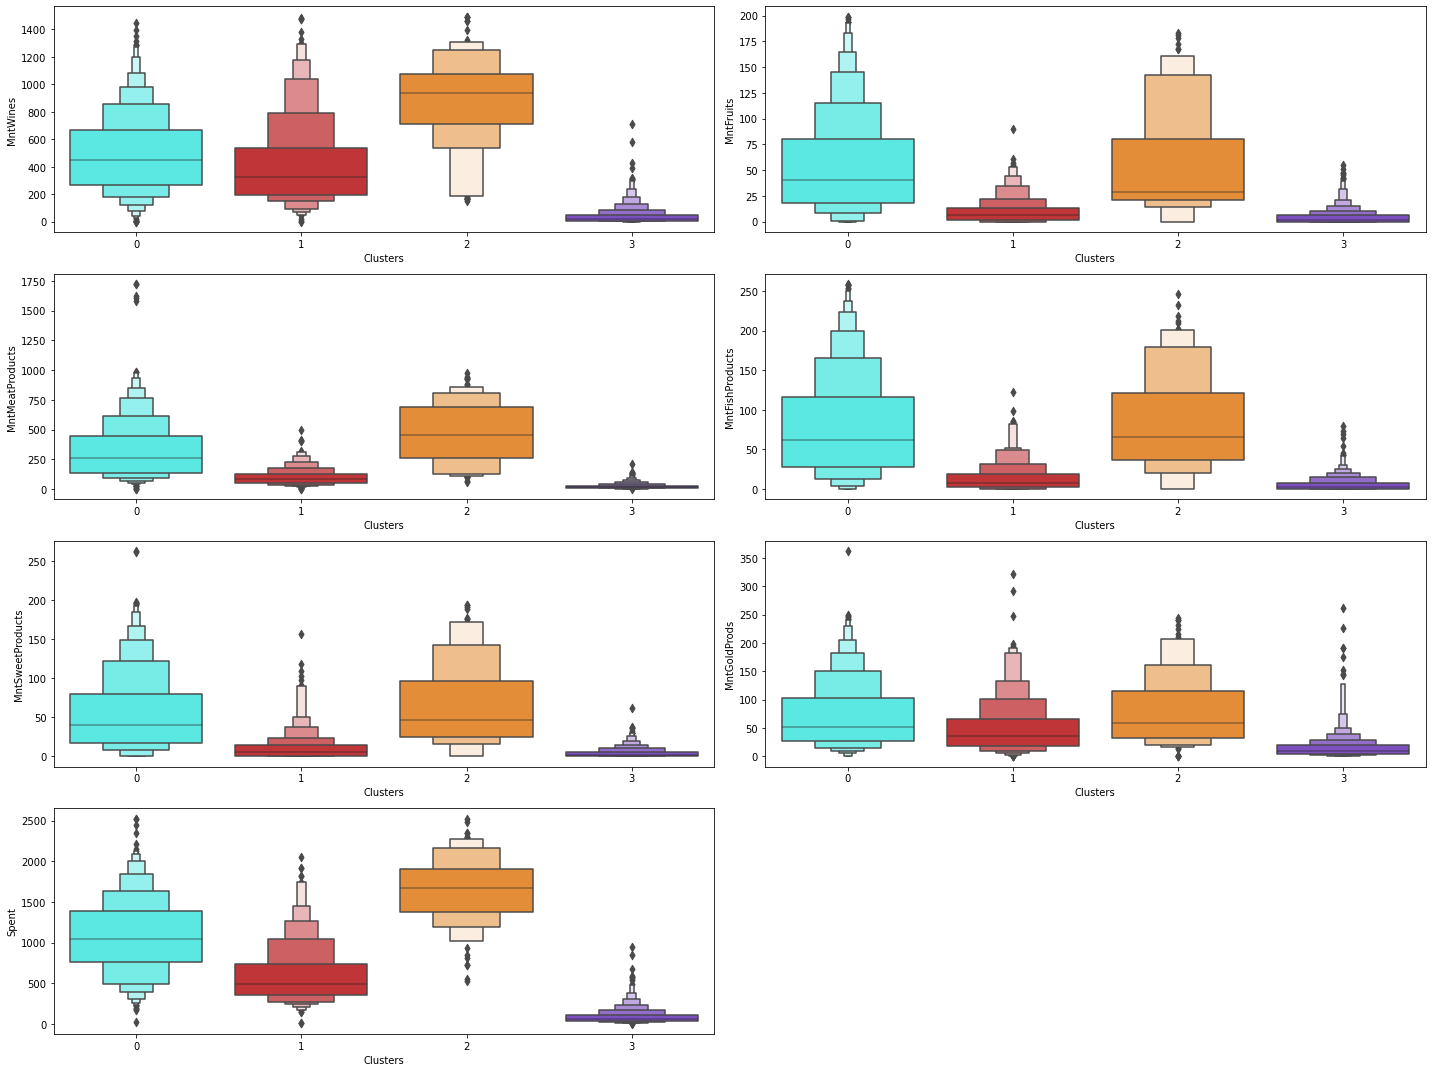

In [36]:
plt.figure(figsize=(20,15))
for i in range(0, len(product)):
    plt.subplot(4, 2, i+1)
    sns.boxenplot(y=df[product[i]], x=PCA_df['Clusters'], palette=pal)
    plt.tight_layout()

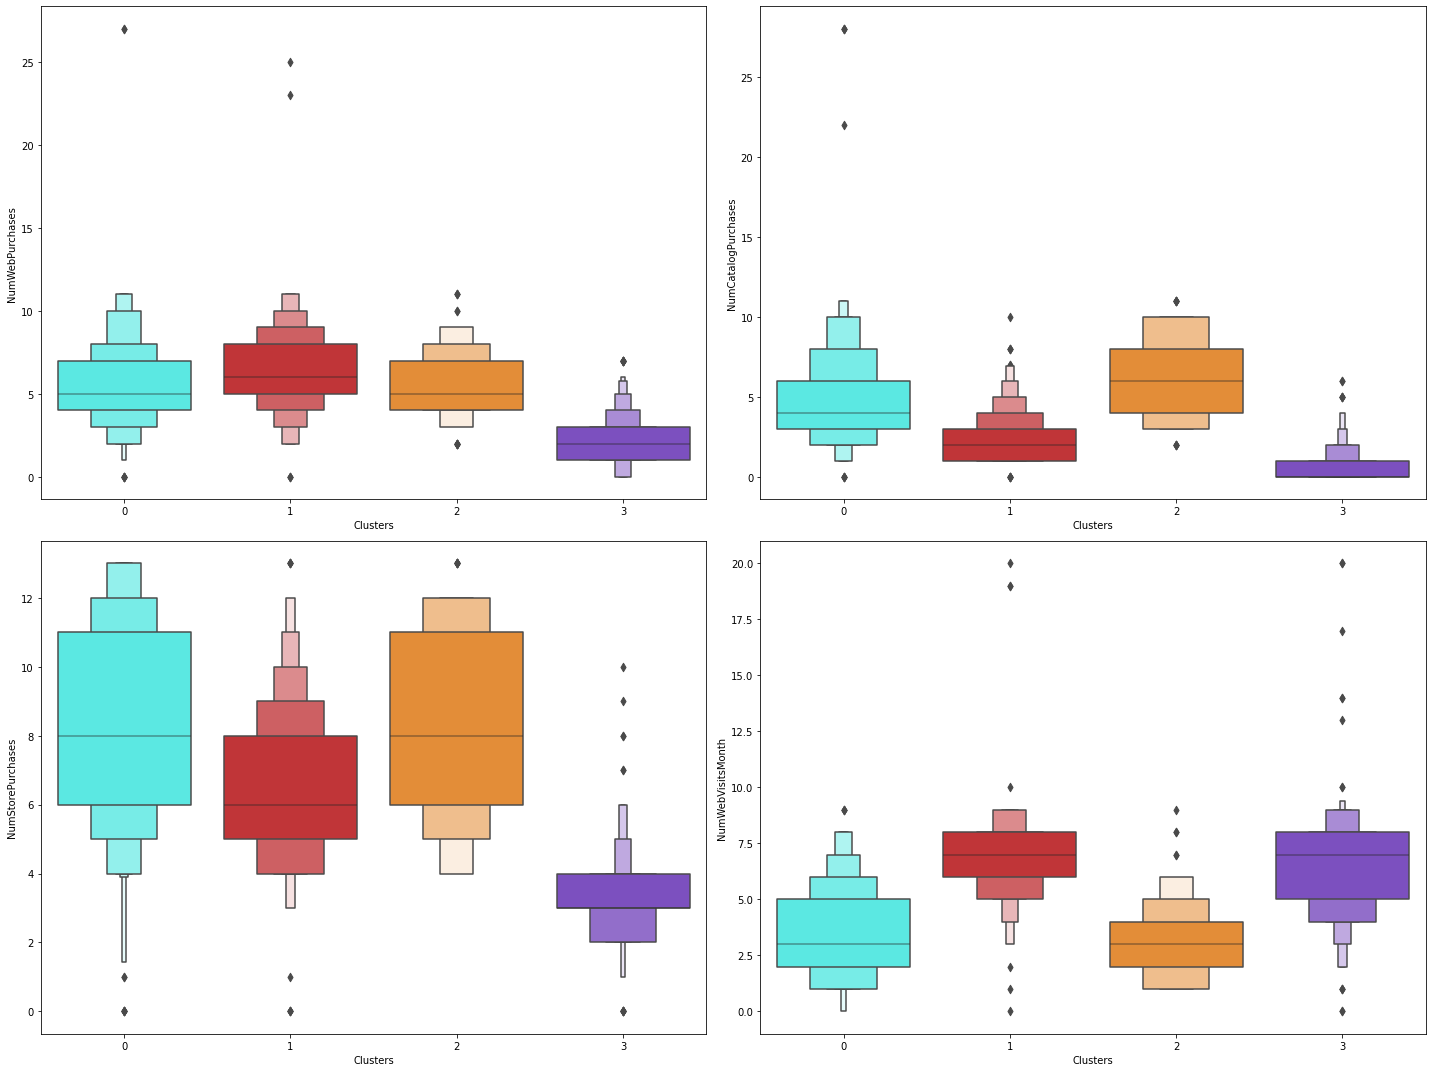

In [37]:
plt.figure(figsize=(20,15))
for i in range(0, len(place)):
    plt.subplot(2, 2, i+1)
    sns.boxenplot(y=df[place[i]], x=PCA_df['Clusters'], palette=pal)
    plt.tight_layout()

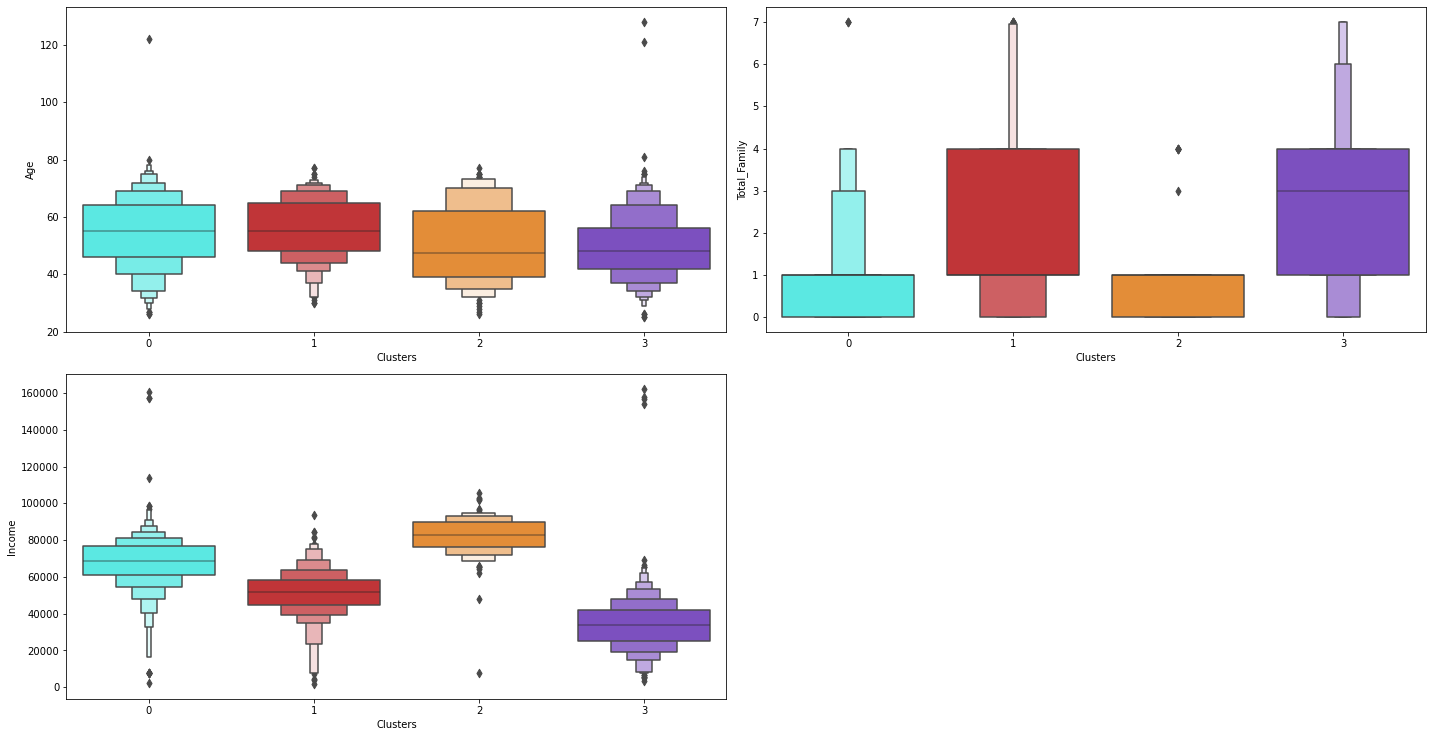

In [38]:
plt.figure(figsize=(20,15))
for i in range(0, len(person1)):
    plt.subplot(3, 2, i+1)
    sns.boxenplot(y=df[person1[i]], x=PCA_df['Clusters'], palette=pal)
    plt.tight_layout()

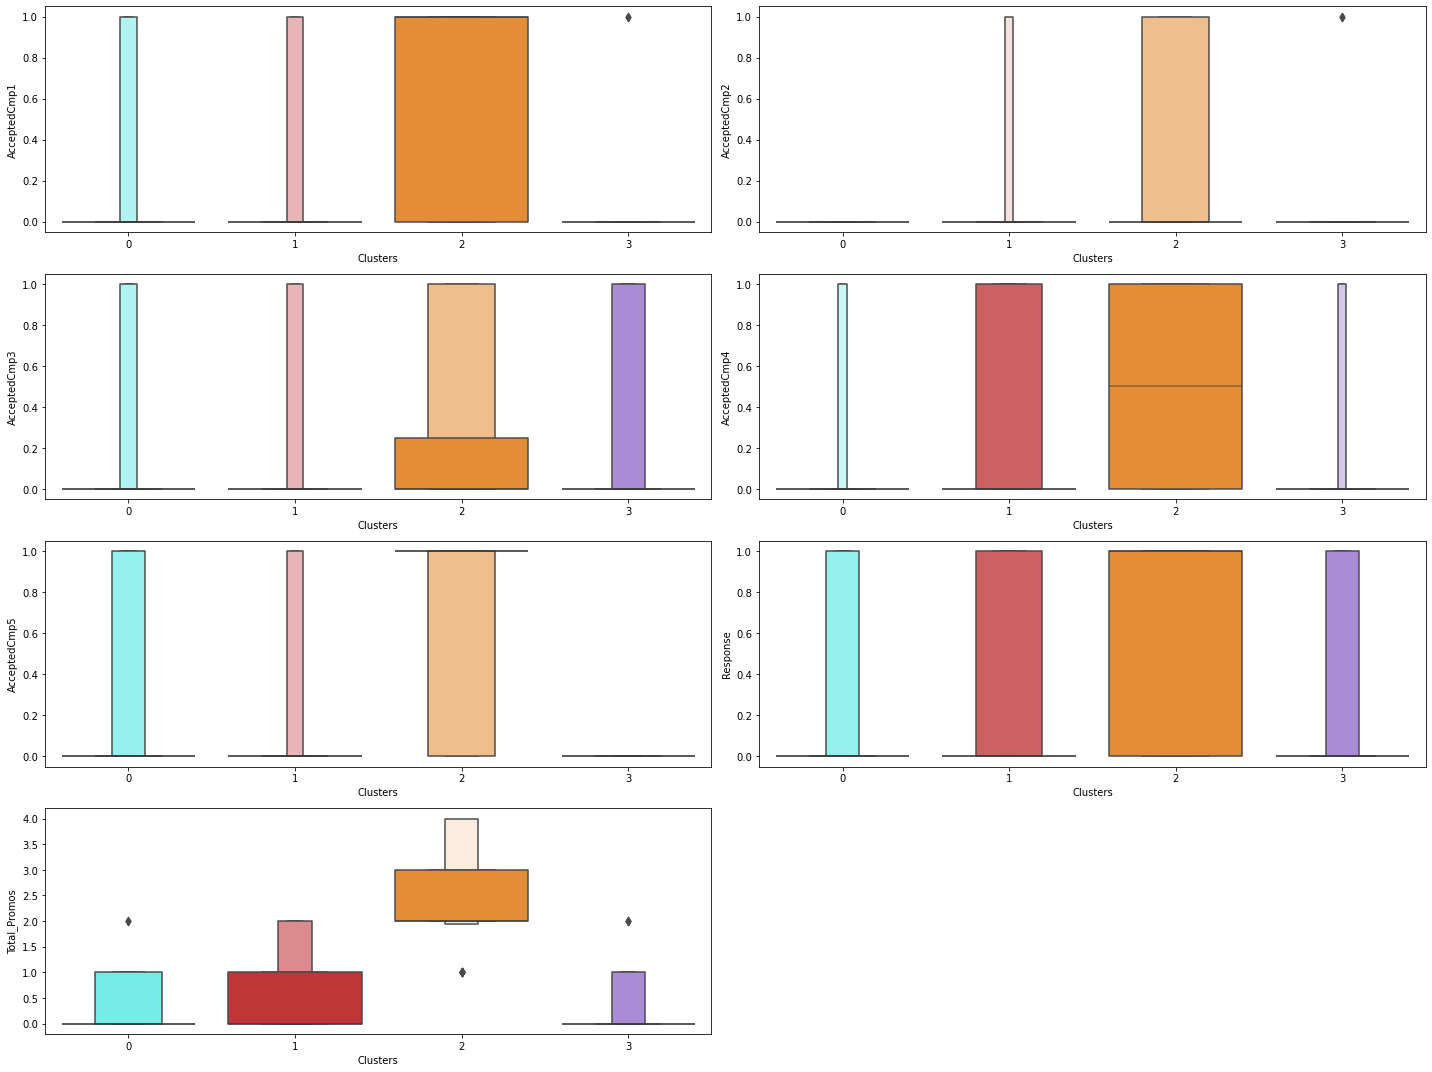

In [39]:
plt.figure(figsize=(20,15))
for i in range(0, len(promotion)):
    plt.subplot(4, 2, i+1)
    sns.boxenplot(y=df[promotion[i]], x=PCA_df['Clusters'], palette=pal)
    plt.tight_layout()

In [126]:
cluster = pd.DataFrame(PCA_df['Clusters'])

person1 = df_old[person1]
person2 = df_old[person2]

In [127]:
clus_df = cluster.merge(person1, left_index=True, right_index=True, how='inner')
clus_df = clus_df.merge(person2, left_index=True, right_index=True, how='inner')
clus_df

,Clusters,Age,Total_Family,Income,Education,Kidhome,Teenhome,Spent
0,0,64,0,58138.0,0,0,0,1617
1,3,67,3,46344.0,0,1,1,27
2,0,56,1,71613.0,0,0,0,776
3,3,37,4,26646.0,0,1,0,53
4,0,40,4,58293.0,1,1,0,422
...,...,...,...,...,...,...,...,...
2234,0,47,4,34421.0,0,1,0,30
2235,1,54,1,61223.0,0,0,1,1341
2236,0,75,7,64014.0,1,2,1,444
2237,0,40,0,56981.0,0,0,0,1241


In [129]:
clus_df["Age"] = pd.cut(x=clus_df["Age"], bins=[0,18,35,55,61,95])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


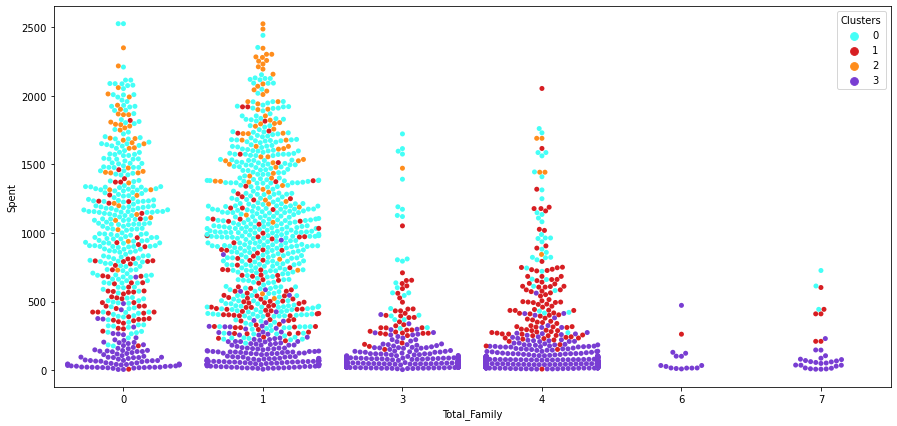

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


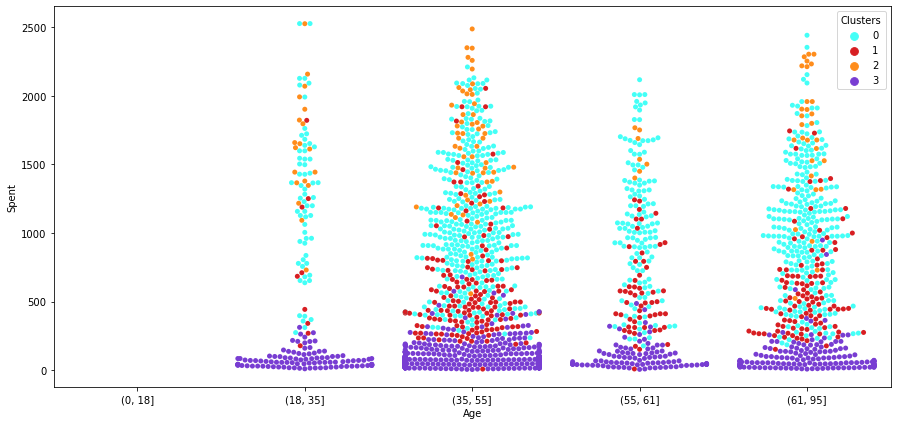

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


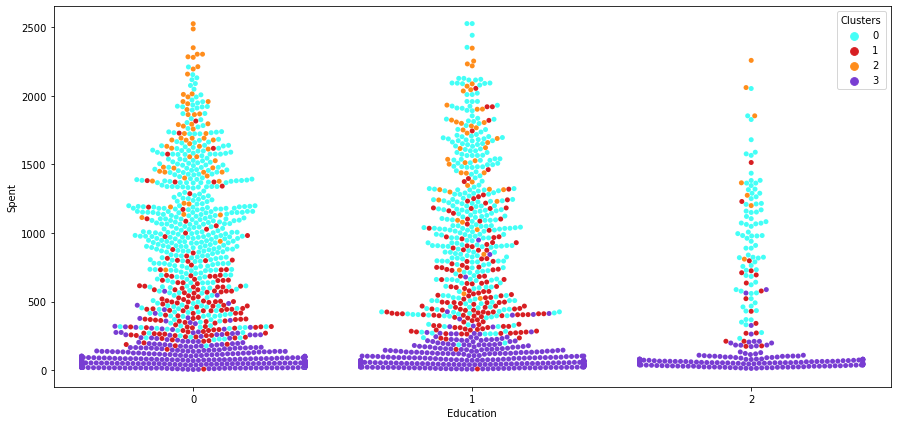

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


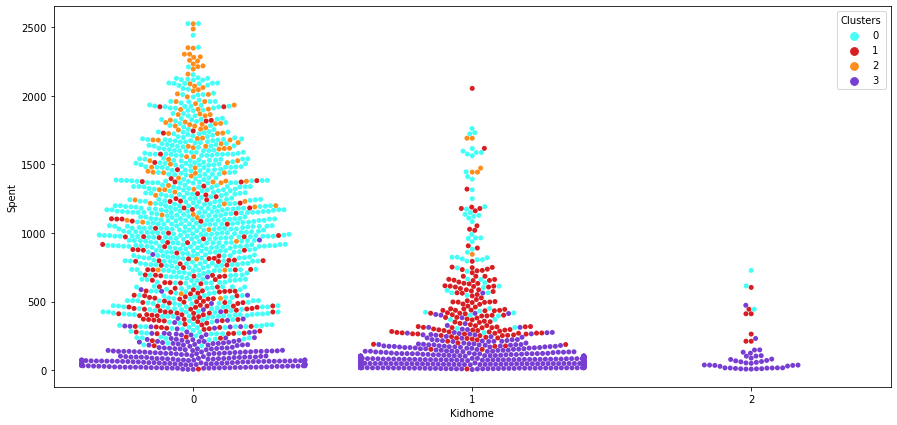

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


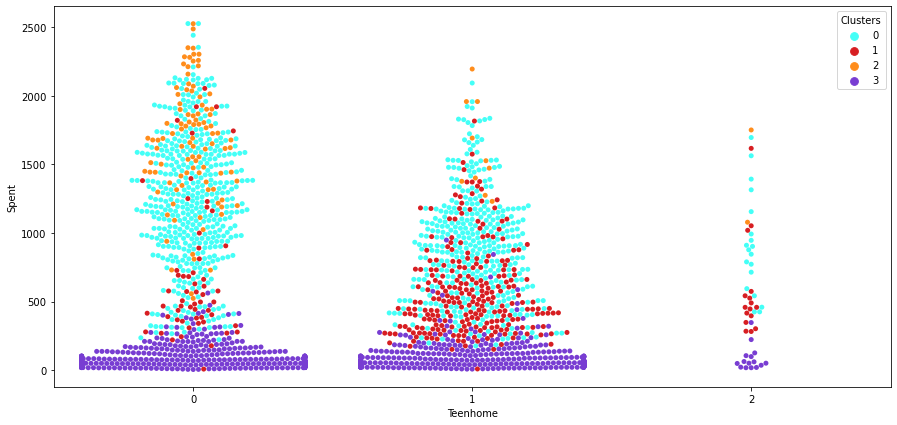

In [130]:
prf = ["Total_Family", "Age", "Education", "Kidhome", 'Teenhome']
for i in prf:
    plt.figure(figsize=(15,7))
    sns.swarmplot(x=i, y="Spent", hue="Clusters", palette=pal ,data=clus_df)
    plt.show()

## Alfa Characteristic

In [60]:
alfa = clus_df[clus_df['Clusters'] == 0]
alfa.describe()

,Clusters,Age,Total_Family,Income,Education,Kidhome,Teenhome,Recency
count,826.0,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,0.0,54.446731,0.865617,68061.054479,0.556901,0.078692,0.480630,49.288136
std,0.0,12.252602,0.976129,14199.451602,0.654889,0.282596,0.544048,28.934480
min,0.0,26.000000,0.000000,2447.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,46.000000,0.000000,61286.000000,0.000000,0.000000,0.000000,24.000000
50%,0.0,55.000000,1.000000,68774.000000,0.000000,0.000000,0.000000,51.000000
75%,0.0,64.000000,1.000000,76991.750000,1.000000,0.000000,1.000000,73.000000
max,0.0,122.000000,7.000000,160803.000000,2.000000,2.000000,2.000000,99.000000


In [43]:
alfa.astype('object').describe()

,Clusters,Age,Total_Family,Income,Education,Kidhome,Teenhome,Recency
count,826,826,826,826.0,826,826,826,826
unique,1,55,5,739.0,3,3,3,100
top,0,56,1,7500.0,0,0,0,29
freq,826,33,482,6.0,441,764,448,20


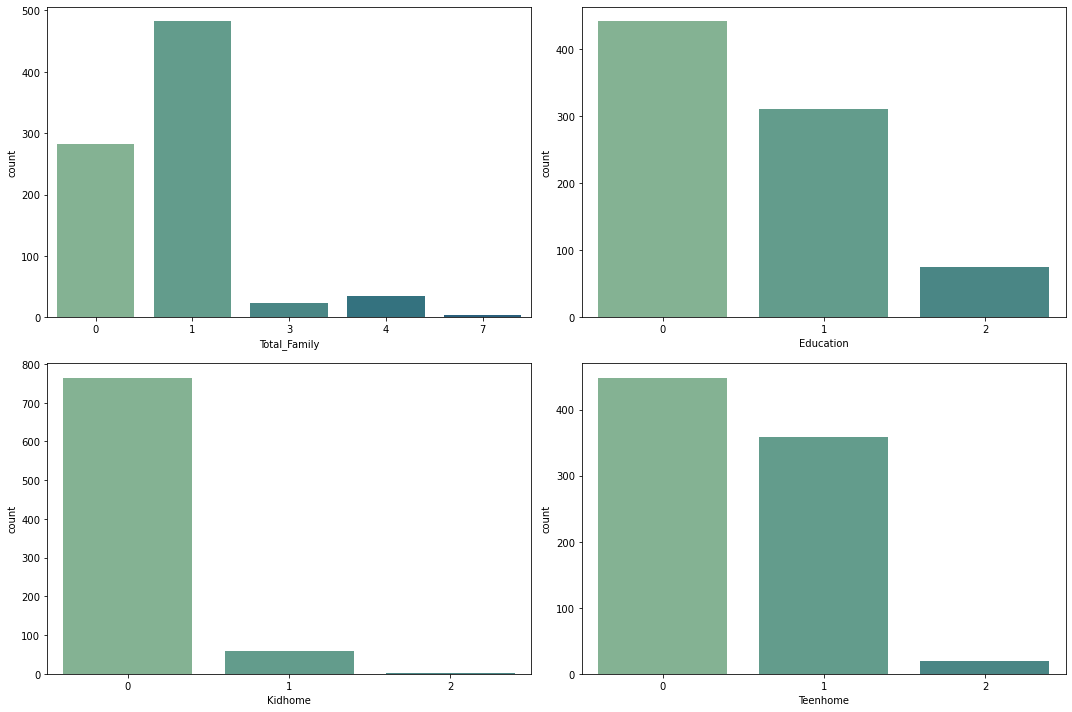

In [113]:
pal2 = sns.color_palette("crest")
plt.figure(figsize=(15,10))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=alfa[cats[i]], palette=pal2)
    plt.tight_layout()

## Beta Characteristic

In [44]:
beta = clus_df[clus_df['Clusters'] == 1]
beta.describe()

,Clusters,Age,Total_Family,Income,Education,Kidhome,Teenhome,Recency
count,324.0,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,1.0,55.509259,2.123457,51273.561728,0.583333,0.481481,0.870370,48.564815
std,0.0,10.383807,1.741020,13090.004017,0.590822,0.542009,0.460702,28.918570
min,1.0,30.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,48.000000,1.000000,44589.250000,0.000000,0.000000,1.000000,24.750000
50%,1.0,55.000000,1.000000,51550.000000,1.000000,0.000000,1.000000,50.000000
75%,1.0,65.000000,4.000000,58283.250000,1.000000,1.000000,1.000000,70.250000
max,1.0,77.000000,7.000000,93404.000000,2.000000,2.000000,2.000000,99.000000


In [45]:
beta.astype('object').describe()

,Clusters,Age,Total_Family,Income,Education,Kidhome,Teenhome,Recency
count,324,324,324,324.0,324,324,324,324
unique,1,47,6,294.0,3,3,3,97
top,1,50,1,7500.0,1,0,1,48
freq,324,18,111,4.0,155,175,250,8


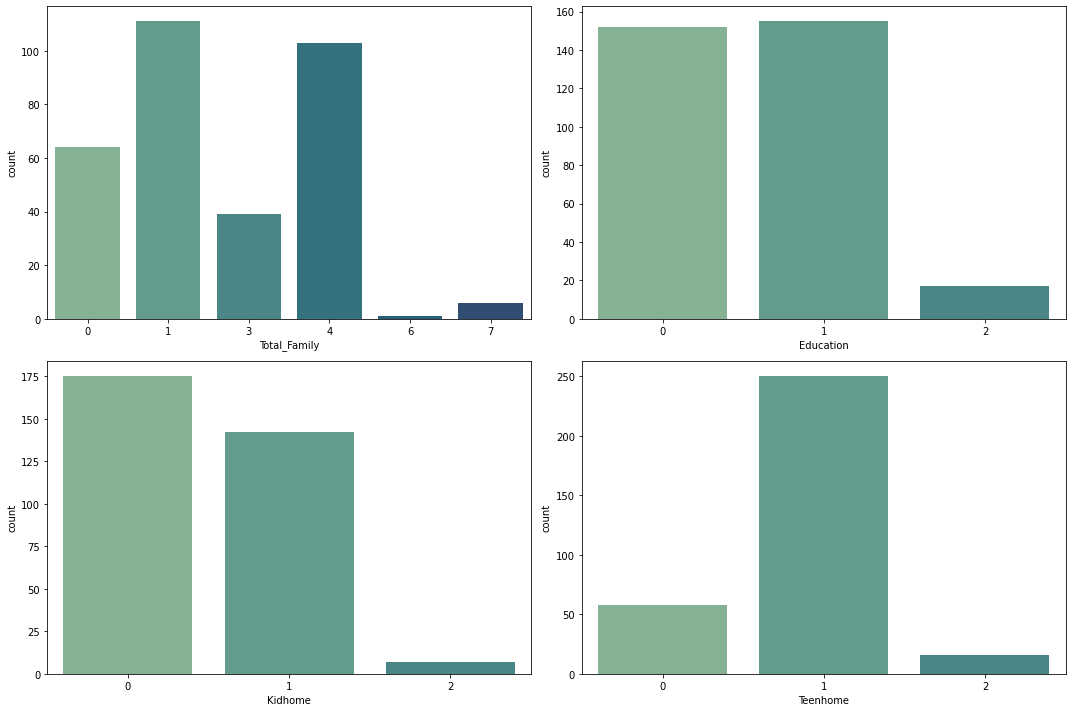

In [114]:
plt.figure(figsize=(15,10))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=beta[cats[i]], palette=pal2)
    plt.tight_layout()

## Teta Characteristic

In [46]:
teta = clus_df[clus_df['Clusters'] == 2]
teta.describe()

,Clusters,Age,Total_Family,Income,Education,Kidhome,Teenhome,Recency
count,112.0,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,2.0,49.866071,0.794643,82092.142857,0.526786,0.053571,0.125000,47.821429
std,0.0,13.942931,0.871350,11825.907045,0.614536,0.226182,0.382618,29.223036
min,2.0,26.000000,0.000000,7500.000000,0.000000,0.000000,0.000000,1.000000
25%,2.0,39.000000,0.000000,76326.000000,0.000000,0.000000,0.000000,23.000000
50%,2.0,47.500000,1.000000,82800.000000,0.000000,0.000000,0.000000,46.000000
75%,2.0,62.000000,1.000000,89770.500000,1.000000,0.000000,0.000000,73.000000
max,2.0,77.000000,4.000000,105471.000000,2.000000,1.000000,2.000000,99.000000


In [50]:
tetao = teta.astype('object')
tetao.describe()

,Clusters,Age,Total_Family,Income,Education,Kidhome,Teenhome,Recency
count,112,112,112,112.0,112,112,112,112
unique,1,46,4,102.0,3,2,3,68
top,2,39,1,80134.0,0,0,0,27
freq,112,6,66,3.0,60,106,100,4


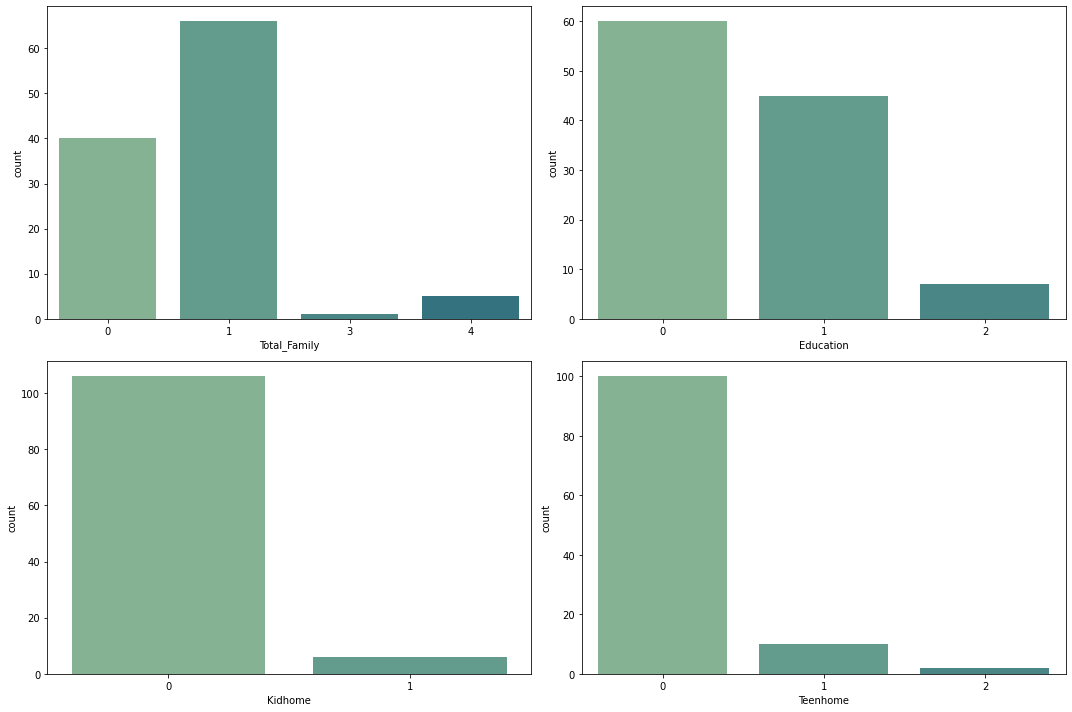

In [116]:
plt.figure(figsize=(15,10))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=teta[cats[i]], palette=pal2)
    plt.tight_layout()

## Delta Characteristic

In [48]:
delta = clus_df[clus_df['Clusters'] == 3]
delta.describe()

,Clusters,Age,Total_Family,Income,Education,Kidhome,Teenhome,Recency
count,976.0,976.000000,976.000000,976.000000,976.000000,976.000000,976.00000,976.000000
mean,3.0,49.447746,3.001025,34031.751025,0.677254,0.784836,0.45082,49.322746
std,0.0,11.336048,1.559421,14552.237764,0.736823,0.496981,0.52783,29.025247
min,3.0,25.000000,0.000000,3502.000000,0.000000,0.000000,0.00000,0.000000
25%,3.0,42.000000,1.000000,24882.000000,0.000000,0.000000,0.00000,24.000000
50%,3.0,48.000000,3.000000,33729.500000,1.000000,1.000000,0.00000,49.000000
75%,3.0,56.000000,4.000000,41904.000000,1.000000,1.000000,1.00000,76.000000
max,3.0,128.000000,7.000000,162397.000000,2.000000,2.000000,2.00000,99.000000


In [49]:
delta.astype('object').describe()

,Clusters,Age,Total_Family,Income,Education,Kidhome,Teenhome,Recency
count,976,976,976,976.0,976,976,976,976
unique,1,53,6,857.0,3,3,3,100
top,3,43,4,7500.0,0,1,0,49
freq,976,45,444,25.0,473,690,551,21


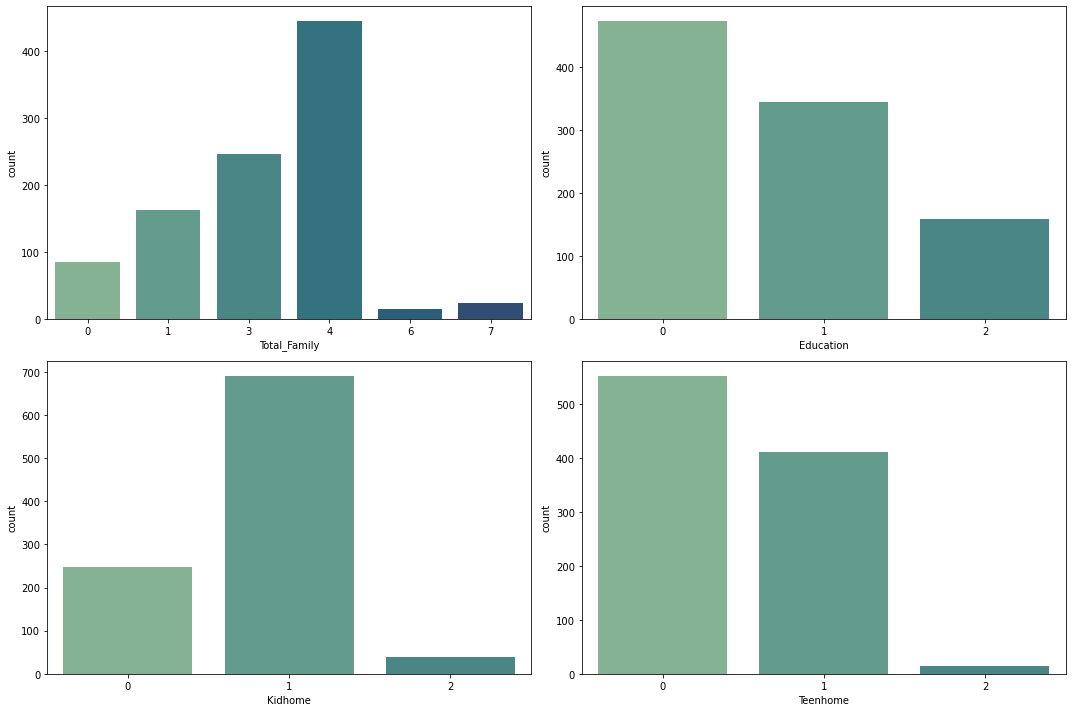

In [115]:
plt.figure(figsize=(15,10))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=delta[cats[i]], palette=pal2)
    plt.tight_layout()

Thank you :)